## Bernoulli Distribution
---

Let us define a random variable $X_i$ $(i=1,\dots,n)$ corresponding to tossing a coin such that
$$
X_i = 
	\begin{cases}
	1, & \text{Head is obtained}; \\
	0, & \text{Tail is obtained},
	\end{cases}
$$
and 
$$
	P(X_i=1) = \theta,\quad P(X_i=0) = 1-\theta.
$$
Then $X_i$ follows the <font color=red>Bernoulli distribution</font> and its p.f. is given by
$$
	p(x_i|\theta) = \theta^{x_i}(1-\theta)^{1-x_i},\quad x_i=0,1.
$$
Then the joint p.f. of $D=(x_1,\dots,x_n)$ is
\begin{align*}
	p(D|\theta) &= \prod_{i=1}^n p(x_i|\theta) = \prod_{i=1}^n \theta^{x_i}(1-\theta)^{1-x_i} \\
	&= \theta^{y}(1-\theta)^{n-y},\quad y = \sum_{i=1}^n x_i.
\end{align*}
When we regard $p(D|\theta)$ as a function of $\theta$, it is called the <font color=red>likelihood</font> or <font color=red>likelihood function</font>.

## Likelihood of Bernoulli Probability
---

The following command enables plotting within cells.

In [1]:
%matplotlib inline

`import` literally imports a package named NumPy in Python. NumPy enable us to use vectors and matrices in Python. It also comes with numerous functions for mathematical computation. `as np` means that we use `np` as a abbreviation of `numpy`.

In [2]:
import numpy as np

This line imports PyPlot, a collection of functions for 2D/3D graphics.

In [3]:
import matplotlib.pyplot as plt

`q` is a 100 $\times$ 1 vector that contains a grid, {0.0, 0.01, $\ldots$, 1.0}. The first number in `linspace(0.1, 1.0, 101)` is the starting point, the second is the end point, and the third is the number of grid points.

In [4]:
q = np.linspace(0.0, 1.0, 101)

`print` shows the content of q

In [5]:
print(q)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]


`n` is the number of observations.

In [6]:
n = 5

`y` is the number of 1's.

In [7]:
y = 4

`l` cotains the values of likelihood corresponding to `q`.

In [8]:
l = q ** y * (1.0 - q) ** (n - y)

The following lines create a graph of the likelihood `l`. `xlim` sets the limits of X-axis. `ylim` sets the limits of Y-axis. `xlabel` sets the label of X-axis. `$\\theta$` shows the Greek letter, $\theta$. `ylabel` sets the label of Y-axis. `savefig` saves the graph in a PNG file. `show` displays the graph on screen.

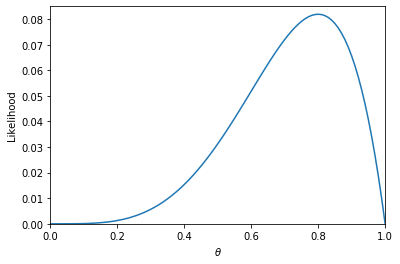

In [9]:
plt.plot(q, l)
plt.xlim(0, 1)
plt.ylim(0, 0.085)
plt.xlabel('$\\theta$')
plt.ylabel('Likelihood')
# plt.savefig('ms_fig_bernoulli_likelihood.png', dpi=300)
plt.show()

`scipy.stats` is a module in `SciPy`, a Python package for scientific computing. `scipy.stats` includes many functions for statistical analysis.

In [10]:
import scipy.stats as st

The following cell draws a plot to illustrate two kinds of prior distribution for the probability of sucess in the Bernoulli distribution.

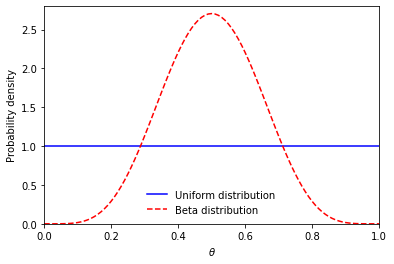

In [11]:
plt.plot(q, st.uniform.pdf(q), 'b-', label='Uniform distribution')
plt.plot(q, st.beta.pdf(q, 6, 6), 'r--', label='Beta distribution')
plt.xlim(0, 1)
plt.ylim(0, 2.8)
plt.legend(loc='best', frameon=False)
plt.xlabel('$\\theta$')
plt.ylabel('Probability density')
# plt.savefig('ms_fig_beta_prior.png', dpi=300)
plt.show()

The uniform distribution is 

$$
 p(x|a,b) = 
 \begin{cases}
 \frac1{b-a}, & (a\leqq x \leqq b); \\
 0, & (\text{otherwise}).
 \end{cases}
$$

In the above figure, we set $a=0$ and $b=1$.

The beta distribution is 

$$
 p(x|\alpha,\beta) = \frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha,\beta)},\ 0\leqq x\leqq 1,
$$

where $B(\alpha,\beta)$ is the beta function:

$$
 B(\alpha,\beta) = \int_0^1x^{\alpha-1}(1-x)^{\beta-1}dx.
$$

## Derivation of the Posterior Distribution of $\theta$
---

Suppose the prior distribution is $\text{Beta}(\alpha_0,\beta_0)$.

The posterior distribution of $\theta$ is given by

\begin{align*}
 p(\theta|D) &\propto p(D|\theta)p(\theta) \\
 &\propto \theta^{y}(1-\theta)^{n-y} \times \theta^{\alpha_0-1}(1-\theta)^{\beta_0-1} \\
 &\propto \theta^{y+\alpha_0-1}(1-\theta)^{n-y+\beta_0-1} \\
 &\propto \theta^{\alpha_\star-1}(1-\theta)^{\beta_\star-1},\\
 \alpha_\star &=y+\alpha_0,\quad \beta_\star=n-y+\beta_0.
\end{align*}

This is the beta distribution $Beta(\alpha_\star,\beta_\star)$.

## A Numerical Example of the Posterior Distribution
---

`p` is the true vale of $\theta$. `n` is the sample size. `a_0` and `b_0` are hyper-parameters in the prior.

In [12]:
p = 0.5
n = 10
a0 = 1.0
b0 = 1.0

Here we generate pseudo-random numbers from tbe Bernoulli distribution with $\theta=\frac12$.

In [13]:
np.random.seed(99)
data = st.bernoulli.rvs(p, size=n)
print(data)

[1 0 1 0 1 1 0 0 1 0]


Using functions in `scipy.stats`, we draw the prior and the posterior distribution.

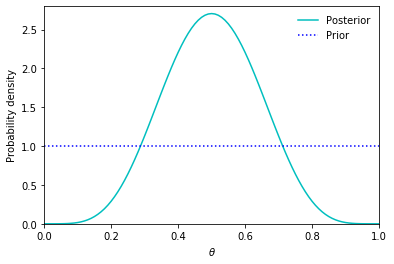

In [14]:
y = np.sum(data)
a_star = y + a0
b_star = n - y + b0
plt.plot(q, st.beta.pdf(q, a_star, b_star), 'c-', label='Posterior')
plt.plot(q, st.beta.pdf(q, a0, b0), 'b:',label='Prior')
plt.xlim(0, 1)
plt.ylim(0, 2.8)
plt.legend(loc='best', frameon=False)
plt.xlabel('$\\theta$')
plt.ylabel('Probability density')
# plt.savefig('ms_fig_bernoulli_posterior.png', dpi=300)
plt.show()

Next, let us see how sequential Bayesian learning updates the shape of the posterior distribution. For this purpose, we generate 250 observations from the same Bernoulli distribution.

In [15]:
np.random.seed(99)
data = st.bernoulli.rvs(p, size=250)
print(data)

[1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0
 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1
 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1
 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0
 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0]


We use the first 10, 50 and 250 observations to construct the posterior distribution. This means that
1. The initial 10 observations are obtained.
2. 40 observations are additionally obtained. Thus the sample size is 50.
3. Moreover 200 observations are obtained. The sample size is 250.

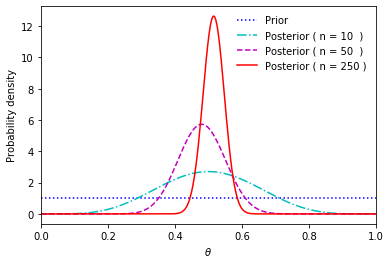

In [16]:
sample_size = np.array([10, 50, 250])
styles = [':', '-.', '--', '-']
colors = ['b', 'c', 'm', 'r']
qq = np.linspace(0.0, 1.0, 250)
index = 0
plt.plot(qq, st.beta.pdf(qq, a0, b0),
         color=colors[index], linestyle=styles[index],
         label='Prior')
for n_j in sample_size:
    index += 1
    sum_data = np.sum(data[:n_j])
    a_j = sum_data + a0
    b_j = n_j - sum_data + b0
    plt.plot(qq, st.beta.pdf(qq, a_j, b_j),
             color=colors[index], linestyle=styles[index],
             label='Posterior ( n = {0:<3d} )'.format(n_j))
plt.xlim(0, 1)
plt.legend(loc='best', frameon=False)
plt.xlabel('$\\theta$')
plt.ylabel('Probability density')
# plt.savefig('ms_fig_bernoulli_convergence.png', dpi=300)
plt.show()

As the number of obsersavions increases, the posterior distribution gets tighter around the true value of $\theta$, $\frac12$.